In [132]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [133]:
url_1 = r"D:\Supervised Machine Learning lab (SMLL)\6\Practice dataset 1 KNN regression Hydropower_Consumption.csv"
url_2 = r"D:\Supervised Machine Learning lab (SMLL)\6\Practice dataset 2 KNNClassifier drug_classification.csv"

In [134]:
df_1 = pd.read_csv(url_1)
df_2 = pd.read_csv(url_2)


In [135]:
df_1.head()


,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,312,498,555,63,565,59,637,748,542,...,751,595,71,804,895,989,1025,105,105,107
1,Africa,75246,80864,85181,82873,87405,89066,92241,95341,97157,...,107427,110445,110952,117673,123727,115801,123816,130388,132735,0
2,Albania,4548,3519,3477,5117,5411,5319,4951,276,3759,...,7673,4036,4725,6959,4726,5866,7136,448,448,4018
3,Algeria,54,69,57,265,251,555,218,226,283,...,173,378,389,99,193,145,72,56,117,152
4,Angola,903,1007,1132,1229,1733,2197,2638,2472,3103,...,3666,3967,3734,4719,4991,5037,5757,7576,7576,8422


In [136]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  153 non-null    object
 1   2000     153 non-null    int64 
 2   2001     153 non-null    int64 
 3   2002     153 non-null    int64 
 4   2003     153 non-null    int64 
 5   2004     153 non-null    int64 
 6   2005     153 non-null    int64 
 7   2006     153 non-null    int64 
 8   2007     153 non-null    int64 
 9   2008     153 non-null    int64 
 10  2009     153 non-null    int64 
 11  2010     153 non-null    int64 
 12  2011     153 non-null    int64 
 13  2012     153 non-null    int64 
 14  2013     153 non-null    int64 
 15  2014     153 non-null    int64 
 16  2015     153 non-null    int64 
 17  2016     153 non-null    int64 
 18  2017     153 non-null    int64 
 19  2018     153 non-null    int64 
 20  2019     153 non-null    int64 
dtypes: int64(20), object(1)
memory usage: 2

In [137]:
df_1.columns

Index(['Country', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019'],
      dtype='object')

In [138]:
df_1.head(20)

,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,312,498,555,63,565,59,637,748,542,...,751,595,71,804,895,989,1025,105,105,107
1,Africa,75246,80864,85181,82873,87405,89066,92241,95341,97157,...,107427,110445,110952,117673,123727,115801,123816,130388,132735,0
2,Albania,4548,3519,3477,5117,5411,5319,4951,276,3759,...,7673,4036,4725,6959,4726,5866,7136,448,448,4018
3,Algeria,54,69,57,265,251,555,218,226,283,...,173,378,389,99,193,145,72,56,117,152
4,Angola,903,1007,1132,1229,1733,2197,2638,2472,3103,...,3666,3967,3734,4719,4991,5037,5757,7576,7576,8422
5,Argentina,34034,41903,41467,3908,35403,3935,43624,37741,37199,...,40543,39641,36876,407,40864,41771,38254,41543,41648,37067
6,Australia,16466,16124,16095,16211,15687,15466,14945,13049,11815,...,13746,19572,17036,19089,14484,14085,17631,13502,17356,14294
7,Austria,41836,40455,40227,33215,36762,37095,35656,37054,38329,...,38363,34239,43804,42047,4101,37056,39845,38293,37638,40732
8,Azerbaijan,1534,1301,202,247,2755,3009,2518,2364,2232,...,3446,2676,1821,1489,13,1638,1959,1746,1768,1565
9,Bangladesh,749,993,749,749,749,749,749,749,95,...,729,872,777,728,566,898,885,103,865,823


In [139]:

X = df_1.drop(columns=['Country', '2019'], axis=1)
y = df_1['2019']

In [140]:
X.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,312,498,555,63,565,59,637,748,542,776,751,595,71,804,895,989,1025,105,105
1,75246,80864,85181,82873,87405,89066,92241,95341,97157,99761,107427,110445,110952,117673,123727,115801,123816,130388,132735
2,4548,3519,3477,5117,5411,5319,4951,276,3759,5201,7673,4036,4725,6959,4726,5866,7136,448,448
3,54,69,57,265,251,555,218,226,283,342,173,378,389,99,193,145,72,56,117
4,903,1007,1132,1229,1733,2197,2638,2472,3103,3063,3666,3967,3734,4719,4991,5037,5757,7576,7576


In [141]:
y.head()

0     107
1       0
2    4018
3     152
4    8422
Name: 2019, dtype: int64

In [142]:
x = pd.get_dummies(df_1, drop_first=True)

In [143]:
scaler = StandardScaler()
x = scaler.fit_transform(X)

In [144]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

In [145]:
para = {
    'n_neighbors': np.arange(1, 21, 2),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

In [146]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
model = GridSearchCV(knn, para, cv=2)
model.fit(X_train, y_train)


GridSearchCV(cv=2, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'weights': ['uniform', 'distance']})

In [147]:
print('Parameters:', model.best_params_)
print('Cross-Validation Score:', model.best_score_)
print('Test Set Score:', model.score(X_test, y_test))
print('R2 Score:', r2_score(y_test, model.predict(X_test)))
print('Accuracy:', model.score(X_test, y_test))


Parameters: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
Cross-Validation Score: 0.535858969560294
Test Set Score: 0.8122423261210245
R2 Score: 0.8122423261210245
Accuracy: 0.8122423261210245


In [148]:
best_knn = KNeighborsRegressor(n_neighbors=1, metric='euclidean', weights='uniform')
best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)


In [149]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Best model RMSE : ", rmse)
print("Best score :", best_knn.score(X_test, y_test))
print("Parameters of best model : ", best_knn.get_params())
print("Cross validation score : ", cross_val_score(best_knn, X, y, cv=10).mean())
print("R2 Score", r2_score(y_test, y_pred))
print("Accuracy : ", best_knn.score(X_test, y_test))

Best model RMSE :  4668.582761395583
Best score : 0.8122423261210245
Parameters of best model :  {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'euclidean', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
Cross validation score :  0.09424287146484053
R2 Score 0.8122423261210245
Accuracy :  0.8122423261210245


C:\Users\Neil\AppData\Local\Temp\ipykernel_3928\1249477697.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


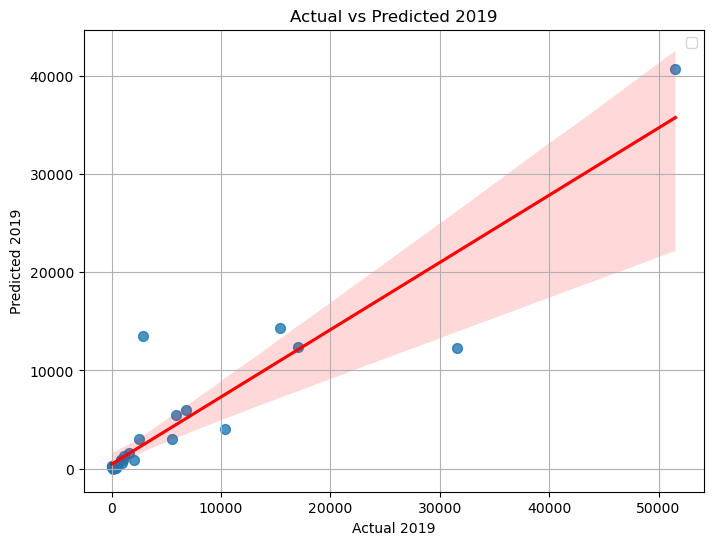

In [150]:

plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws = {'s':50}, line_kws = {'color':'red'})
plt.xlabel('Actual 2019')
plt.ylabel('Predicted 2019')
plt.title('Actual vs Predicted 2019')
plt.legend()
plt.grid(True)
plt.show()
